In [14]:
import random
import matplotlib.pyplot as plt

## Blackjack

Blackjack is a game of cards where the goal is to get a hand that sums higher than the dealers hand, but is no higher than 21. This is a simulation of one player against the house using different hit thresholds.

The hit threshold for this simulation is defined as the maximum sum the player can have before holding. Taking a look online, you will find various recommendations on where a player should set their hit threshold. I have seen values anywhere between 12 and 17 be stated as the optimal hit threshold. 

The goal of this simulation is to give insight on the viability of different hit thresholds in the game of blackjack.


In [25]:
def draw_card(deck):
    # Draw a random card from the deck
    card = random.choice(deck)
    deck.remove(card)
    return card

In [26]:
def calculate_hand_value(hand):
    # Calculate the value of a hand
    values = {'2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, 'J': 10, 'Q': 10, 'K': 10, 'A': 11}
    value = sum(values[card] for card in hand)
    num_aces = hand.count('A')
    
    # Take aces into account if any exist
    while value > 21 and num_aces:
        value -= 10
        num_aces -= 1
    
    return value

In [27]:
def play_blackjack(hit_threshold=16):
    # Play a single game of blackjack and return True if the player wins, False otherwise
    
    # Initialize deck and hands
    deck = 4 * ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    player_hand = [draw_card(deck), draw_card(deck)]
    dealer_hand = [draw_card(deck), draw_card(deck)]
    
    # Player's turn
    while calculate_hand_value(player_hand) < hit_threshold:
        player_hand.append(draw_card(deck))
    
    # Dealer's turn. The dealer must draw if their sum is less than 17. House rules
    while calculate_hand_value(dealer_hand) < 17:
        dealer_hand.append(draw_card(deck))
    
    # Determine winner
    player_value = calculate_hand_value(player_hand)
    dealer_value = calculate_hand_value(dealer_hand)

    if player_value > 21 or (21 >= dealer_value >= player_value):
        # Player loses
        return False
    elif player_value == dealer_value:
        # Draw
        return False
    else:
        # Player wins
        return True

In [28]:
def calculate_win_probability(num_simulations, hit_threshold=16):
    # Calculate the probability of winning based on the number of wins and total simulations
    wins = sum(play_blackjack(hit_threshold) for _ in range(num_simulations))
    win_probability = wins / num_simulations
    return win_probability

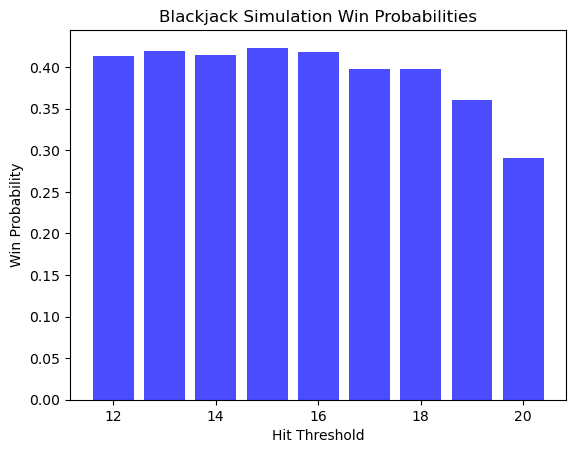

In [35]:
num_simulations = 10000
hit_thresholds = [12, 13, 14, 15, 16, 17, 18, 19, 20]

win_probabilities = [calculate_win_probability(num_simulations, hit_threshold=threshold) for threshold in hit_thresholds]

plt.bar(hit_thresholds, win_probabilities, color='blue', alpha=0.7)
plt.xlabel('Hit Threshold')
plt.ylabel('Win Probability')
plt.title('Blackjack Simulation Win Probabilities')
plt.show()

It looks like the internet is rightly conflicted. The win probabilities are typically all above 40% for hit thresholds 12 through 17. After running the simulation a few times on a higher number of simulations, it seems that a threshold of 14 or 15 is the optimal choice under these conditions.

I know this isn't the most complicated or original choice for a simulation. I originally wanted to simulate Caravan from Fallout New Vegas but was running into some trouble with getting it to work, so I had to pivot. Good news is, this one actually works! 